# Evaluate hnne v2

In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from hnne import HNNE as HNNE_ORIG
from hnne_v2 import HNNE as HNNE_V2
from benchmarking.evaluation import dim_reduction_benchmark
from benchmarking.data import (
    validation_ranges_small,
    load_coil20, 
    load_shuttle, 
    load_mnist,
    load_fmnist,
    load_imagenet_test,
    load_cifar_10,
    load_bbt,
    load_buffy,
    load_imagenet_train,
    load_google_news,
    load_higgs
)

In [9]:
DATA_PATH = Path("/home/marios/datasets/hnne_datasets")
PROJ_PATH = DATA_PATH / "projections"
cmap = "tab20"

In [20]:
knn_values = validation_ranges_small
compute_trustworthiness = True
n_splits = 5
scores = {}

In [40]:
def plot_dataset_scores(name, scores, figsize=(6, 4)):
    plt.figure(figsize=figsize)
    plt.title(name)
    for algo, metrics in scores.items():
        plt.plot(metrics.keys(), metrics.values(), label=algo)

    plt.legend()
    plt.show()

## Coil-20

In [7]:
dataset_name = "COIL-20"
data, labels = load_coil20(DATA_PATH)
print(data.shape, labels.shape)

(1440, 16384) (1440,)


In [12]:
projections = np.load(PROJ_PATH / f"{dataset_name}.npz")
proj, proj_new, proj_v2 = projections["proj"], projections["proj_new"], projections["proj_v2"]

In [39]:
%%time
current_scores = {}
for algo, projection in [("hnne", proj), ("hnne_new", proj_new), ("hnne_v2", proj_v2)]:
    print(f"Evaluating {algo} ...")
    proj_knn_acc, tw = dim_reduction_benchmark(
        k_values=knn_values,
        data=data,
        embedding=projection,
        labels=labels,
        compute_trustworthiness=compute_trustworthiness,
        n_splits=n_splits
    )
    current_scores[algo] = {"tw": tw, **{k: v.mean() for k, v in proj_knn_acc.items()}}
    
scores[dataset_name] = current_scores

Evaluating hnne ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 32.44it/s]


Evaluating hnne_new ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 33.14it/s]


Evaluating hnne_v2 ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 33.51it/s]

CPU times: user 4.83 s, sys: 6.25 s, total: 11.1 s
Wall time: 1.82 s


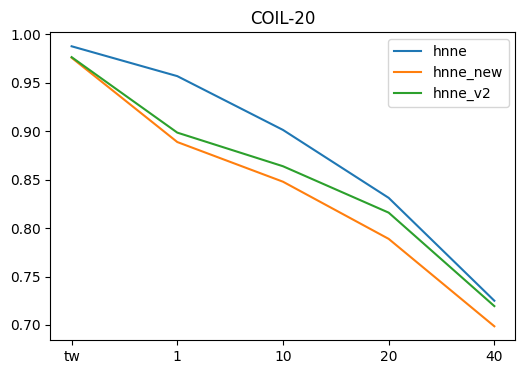

In [41]:
plot_dataset_scores(dataset_name, scores[dataset_name])

## Shuttle

In [47]:
dataset_name = "Shuttle"
data, labels = load_shuttle(DATA_PATH)
print(data.shape, labels.shape)

(58000, 9) (58000,)


In [48]:
projections = np.load(PROJ_PATH / f"{dataset_name}.npz")
proj, proj_new, proj_v2 = projections["proj"], projections["proj_new"], projections["proj_v2"]

In [49]:
%%time
current_scores = {}
for algo, projection in [("hnne", proj), ("hnne_new", proj_new), ("hnne_v2", proj_v2)]:
    print(f"Evaluating {algo} ...")
    proj_knn_acc, tw = dim_reduction_benchmark(
        k_values=knn_values,
        data=data,
        embedding=projection,
        labels=labels,
        compute_trustworthiness=compute_trustworthiness,
        n_splits=n_splits
    )
    current_scores[algo] = {"tw": tw, **{k: v.mean() for k, v in proj_knn_acc.items()}}
    
scores[dataset_name] = current_scores

Evaluating hnne ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.06s/it]


Evaluating hnne_new ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.05s/it]


Evaluating hnne_v2 ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.07s/it]

CPU times: user 1min 22s, sys: 26.2 s, total: 1min 49s
Wall time: 1min 3s


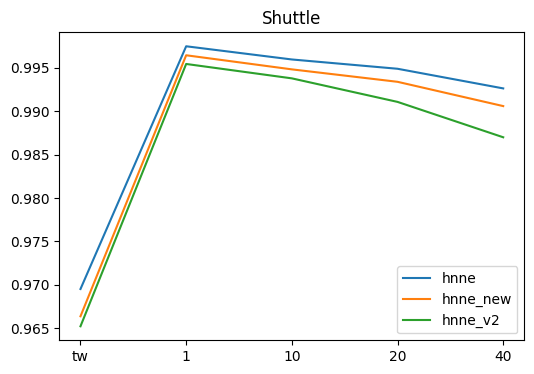

In [50]:
plot_dataset_scores(dataset_name, scores[dataset_name])

## MNIST

In [51]:
dataset_name = "MNIST"
data, labels = load_mnist(DATA_PATH)
print(data.shape, labels.shape)

(70000, 784) (70000,)


In [52]:
projections = np.load(PROJ_PATH / f"{dataset_name}.npz")
proj, proj_new, proj_v2 = projections["proj"], projections["proj_new"], projections["proj_v2"]

In [53]:
%%time
current_scores = {}
for algo, projection in [("hnne", proj), ("hnne_new", proj_new), ("hnne_v2", proj_v2)]:
    print(f"Evaluating {algo} ...")
    proj_knn_acc, tw = dim_reduction_benchmark(
        k_values=knn_values,
        data=data,
        embedding=projection,
        labels=labels,
        compute_trustworthiness=compute_trustworthiness,
        n_splits=n_splits
    )
    current_scores[algo] = {"tw": tw, **{k: v.mean() for k, v in proj_knn_acc.items()}}
    
scores[dataset_name] = current_scores

Evaluating hnne ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.09s/it]


Evaluating hnne_new ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.09s/it]


Evaluating hnne_v2 ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.10s/it]

CPU times: user 1min 50s, sys: 29.2 s, total: 2min 20s
Wall time: 1min 5s


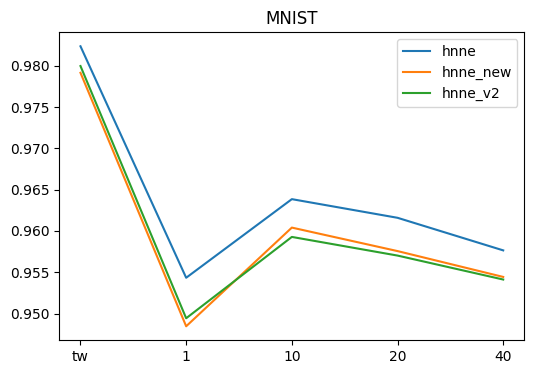

In [54]:
plot_dataset_scores(dataset_name, scores[dataset_name])

## FMNIST

In [55]:
dataset_name = "FMNIST"
data, labels = load_fmnist(DATA_PATH)
print(data.shape, labels.shape)

(70000, 784) (70000,)


In [56]:
projections = np.load(PROJ_PATH / f"{dataset_name}.npz")
proj, proj_new, proj_v2 = projections["proj"], projections["proj_new"], projections["proj_v2"]

In [57]:
%%time
current_scores = {}
for algo, projection in [("hnne", proj), ("hnne_new", proj_new), ("hnne_v2", proj_v2)]:
    print(f"Evaluating {algo} ...")
    proj_knn_acc, tw = dim_reduction_benchmark(
        k_values=knn_values,
        data=data,
        embedding=projection,
        labels=labels,
        compute_trustworthiness=compute_trustworthiness,
        n_splits=n_splits
    )
    current_scores[algo] = {"tw": tw, **{k: v.mean() for k, v in proj_knn_acc.items()}}
    
scores[dataset_name] = current_scores

Evaluating hnne ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.10s/it]


Evaluating hnne_new ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.11s/it]


Evaluating hnne_v2 ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.09s/it]

CPU times: user 2min 4s, sys: 28.6 s, total: 2min 33s
Wall time: 1min 6s


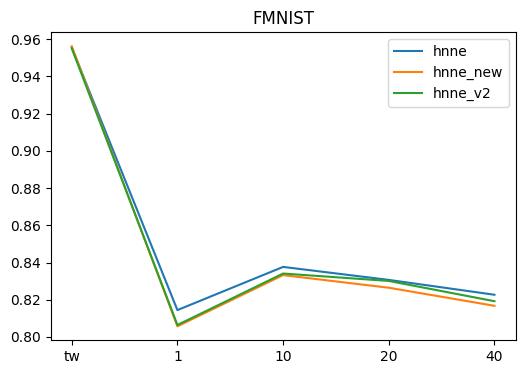

In [58]:
plot_dataset_scores(dataset_name, scores[dataset_name])

## ImageNet Test

In [59]:
dataset_name = "ImageNet Test"
data, labels = load_imagenet_test(DATA_PATH)
print(data.shape, labels.shape)

(50000, 2048) (50000,)


In [60]:
projections = np.load(PROJ_PATH / f"{dataset_name}.npz")
proj, proj_new, proj_v2 = projections["proj"], projections["proj_new"], projections["proj_v2"]

In [61]:
%%time
current_scores = {}
for algo, projection in [("hnne", proj), ("hnne_new", proj_new), ("hnne_v2", proj_v2)]:
    print(f"Evaluating {algo} ...")
    proj_knn_acc, tw = dim_reduction_benchmark(
        k_values=knn_values,
        data=data,
        embedding=projection,
        labels=labels,
        compute_trustworthiness=compute_trustworthiness,
        n_splits=n_splits
    )
    current_scores[algo] = {"tw": tw, **{k: v.mean() for k, v in proj_knn_acc.items()}}
    
scores[dataset_name] = current_scores

Evaluating hnne ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:20<00:00,  1.04s/it]


Evaluating hnne_new ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.06s/it]


Evaluating hnne_v2 ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:20<00:00,  1.05s/it]

CPU times: user 2min 42s, sys: 1min 18s, total: 4min
Wall time: 1min 3s


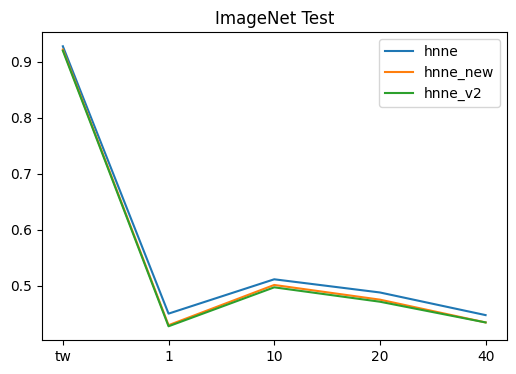

In [62]:
plot_dataset_scores(dataset_name, scores[dataset_name])

## CIFAR-10

In [64]:
dataset_name = "CIFAR-10"
data, labels = load_cifar_10(DATA_PATH)
print(data.shape, labels.shape)

Files already downloaded and verified
Files already downloaded and verified
(60000, 3072) (60000,)


In [65]:
projections = np.load(PROJ_PATH / f"{dataset_name}.npz")
proj, proj_new, proj_v2 = projections["proj"], projections["proj_new"], projections["proj_v2"]

In [66]:
%%time
current_scores = {}
for algo, projection in [("hnne", proj), ("hnne_new", proj_new), ("hnne_v2", proj_v2)]:
    print(f"Evaluating {algo} ...")
    proj_knn_acc, tw = dim_reduction_benchmark(
        k_values=knn_values,
        data=data,
        embedding=projection,
        labels=labels,
        compute_trustworthiness=compute_trustworthiness,
        n_splits=n_splits
    )
    current_scores[algo] = {"tw": tw, **{k: v.mean() for k, v in proj_knn_acc.items()}}
    
scores[dataset_name] = current_scores

Evaluating hnne ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.13s/it]


Evaluating hnne_new ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.11s/it]


Evaluating hnne_v2 ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.10s/it]

CPU times: user 2min 57s, sys: 35.2 s, total: 3min 32s
Wall time: 1min 6s


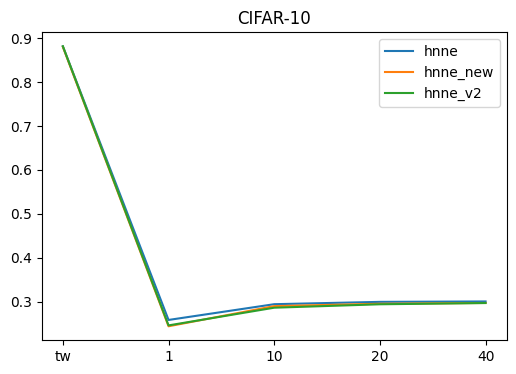

In [67]:
plot_dataset_scores(dataset_name, scores[dataset_name])

## BBT

In [68]:
dataset_name = "BBT"
data, labels = load_bbt(DATA_PATH)
print(data.shape, labels.shape)

(199346, 2048) (199346,)


In [69]:
projections = np.load(PROJ_PATH / f"{dataset_name}.npz")
proj, proj_new, proj_v2 = projections["proj"], projections["proj_new"], projections["proj_v2"]

In [70]:
%%time
current_scores = {}
for algo, projection in [("hnne", proj), ("hnne_new", proj_new), ("hnne_v2", proj_v2)]:
    print(f"Evaluating {algo} ...")
    proj_knn_acc, tw = dim_reduction_benchmark(
        k_values=knn_values,
        data=data,
        embedding=projection,
        labels=labels,
        compute_trustworthiness=compute_trustworthiness,
        n_splits=n_splits
    )
    current_scores[algo] = {"tw": tw, **{k: v.mean() for k, v in proj_knn_acc.items()}}
    
scores[dataset_name] = current_scores

Evaluating hnne ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:30<00:00,  1.50s/it]


Evaluating hnne_new ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:30<00:00,  1.50s/it]


Evaluating hnne_v2 ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:30<00:00,  1.51s/it]

CPU times: user 4min 15s, sys: 1min 18s, total: 5min 33s
Wall time: 1min 30s


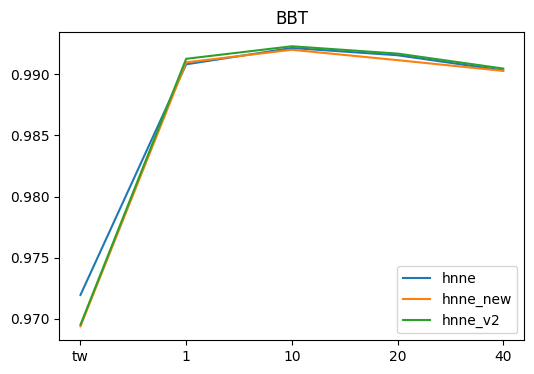

In [71]:
plot_dataset_scores(dataset_name, scores[dataset_name])

## Buffy

In [72]:
dataset_name = "Buffy"
data, labels = load_buffy(DATA_PATH)
print(data.shape, labels.shape)

(206254, 2048) (206254,)


In [73]:
projections = np.load(PROJ_PATH / f"{dataset_name}.npz")
proj, proj_new, proj_v2 = projections["proj"], projections["proj_new"], projections["proj_v2"]

In [74]:
%%time
current_scores = {}
for algo, projection in [("hnne", proj), ("hnne_new", proj_new), ("hnne_v2", proj_v2)]:
    print(f"Evaluating {algo} ...")
    proj_knn_acc, tw = dim_reduction_benchmark(
        k_values=knn_values,
        data=data,
        embedding=projection,
        labels=labels,
        compute_trustworthiness=compute_trustworthiness,
        n_splits=n_splits
    )
    current_scores[algo] = {"tw": tw, **{k: v.mean() for k, v in proj_knn_acc.items()}}
    
scores[dataset_name] = current_scores

Evaluating hnne ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:31<00:00,  1.57s/it]


Evaluating hnne_new ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:31<00:00,  1.57s/it]


Evaluating hnne_v2 ...


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:31<00:00,  1.59s/it]

CPU times: user 5min 21s, sys: 1min 15s, total: 6min 36s
Wall time: 1min 34s


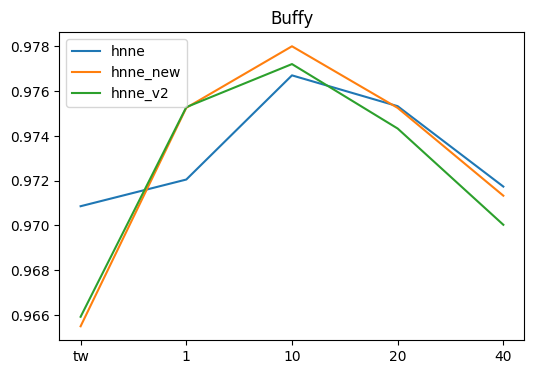

In [75]:
plot_dataset_scores(dataset_name, scores[dataset_name])

## ImageNet Train

In [76]:
dataset_name = "ImageNet Train"
data, labels = load_imagenet_train(DATA_PATH)
print(data.shape, labels.shape)

(1281167, 2048) (1281167,)


In [77]:
projections = np.load(PROJ_PATH / f"{dataset_name}.npz")
proj, proj_new, proj_v2 = projections["proj"], projections["proj_new"], projections["proj_v2"]

In [78]:
%%time
current_scores = {}
for algo, projection in [("hnne", proj), ("hnne_new", proj_new), ("hnne_v2", proj_v2)]:
    print(f"Evaluating {algo} ...")
    proj_knn_acc, tw = dim_reduction_benchmark(
        k_values=knn_values,
        data=data,
        embedding=projection,
        labels=labels,
        compute_trustworthiness=compute_trustworthiness,
        n_splits=n_splits
    )
    current_scores[algo] = {"tw": tw, **{k: v.mean() for k, v in proj_knn_acc.items()}}
    
scores[dataset_name] = current_scores

Evaluating hnne ...
Will subsample train datasets from 1153050.3 to 300000 for [1, 10, 20, 40]-nn evaluation.


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:35<00:00,  4.80s/it]


Evaluating hnne_new ...
Will subsample train datasets from 1153050.3 to 300000 for [1, 10, 20, 40]-nn evaluation.


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:36<00:00,  4.81s/it]


Evaluating hnne_v2 ...
Will subsample train datasets from 1153050.3 to 300000 for [1, 10, 20, 40]-nn evaluation.


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:36<00:00,  4.80s/it]

CPU times: user 18min 7s, sys: 1min 19s, total: 19min 26s
Wall time: 4min 48s


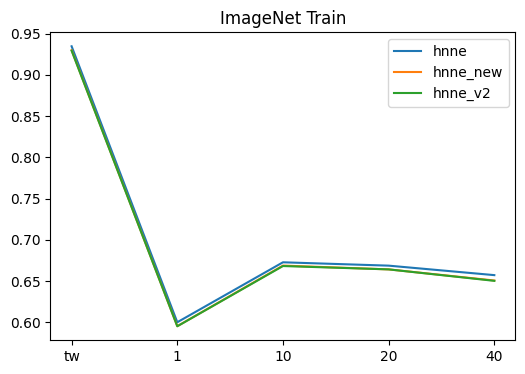

In [79]:
plot_dataset_scores(dataset_name, scores[dataset_name])

## Higgs

In [80]:
dataset_name = "Higgs"
data, labels = load_higgs(DATA_PATH)
print(data.shape, labels.shape)

(11000000, 28) (11000000,)


In [81]:
projections = np.load(PROJ_PATH / f"{dataset_name}.npz")
proj, proj_new, proj_v2 = projections["proj"], projections["proj_new"], projections["proj_v2"]

In [82]:
%%time
current_scores = {}
for algo, projection in [("hnne", proj), ("hnne_new", proj_new), ("hnne_v2", proj_v2)]:
    print(f"Evaluating {algo} ...")
    proj_knn_acc, tw = dim_reduction_benchmark(
        k_values=knn_values,
        data=data,
        embedding=projection,
        labels=labels,
        compute_trustworthiness=compute_trustworthiness,
        n_splits=n_splits
    )
    current_scores[algo] = {"tw": tw, **{k: v.mean() for k, v in proj_knn_acc.items()}}
    
scores[dataset_name] = current_scores

Evaluating hnne ...
Will subsample train datasets from 9900000.0 to 300000 for [1, 10, 20, 40]-nn evaluation.


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [11:15<00:00, 33.80s/it]


Evaluating hnne_new ...
Will subsample train datasets from 9900000.0 to 300000 for [1, 10, 20, 40]-nn evaluation.


100%|█████████████████████████████████████████████████████████████████████████████████████| 20/20 [47:22<00:00, 142.12s/it]


Evaluating hnne_v2 ...
Will subsample train datasets from 9900000.0 to 300000 for [1, 10, 20, 40]-nn evaluation.


100%|██████████████████████████████████████████████████████████████████████████████████████| 20/20 [27:48<00:00, 83.43s/it]

CPU times: user 1d 6h 21min 34s, sys: 1min 1s, total: 1d 6h 22min 35s
Wall time: 1h 26min 26s


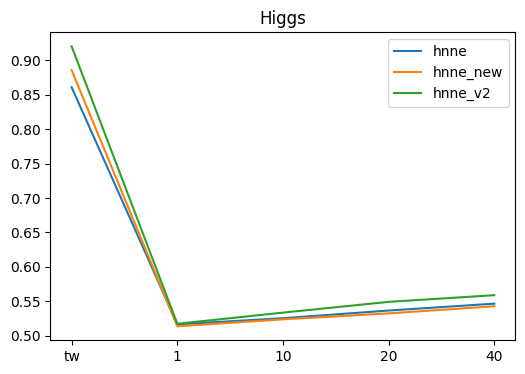

In [83]:
plot_dataset_scores(dataset_name, scores[dataset_name])